<h1 style="color:orange; text-align:left;size:10">Leveraging Random Forest, Regression, and KNN for Predicting Cryptocurrency Prices: </h1>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools as tools

# Load the Ethereum and Bitcoin datasets
ethereum_df = pd.read_csv("/mnt/data/ethereum.csv")
bitcoin_df = pd.read_csv("/mnt/data/Bitcoin.csv")

# Display the first few rows of each dataset
ethereum_head = ethereum_df.head()
bitcoin_head = bitcoin_df.head()

# Display basic information about the datasets
ethereum_info = ethereum_df.info()
bitcoin_info = bitcoin_df.info()

# Describe numerical statistics
ethereum_stats = ethereum_df.describe()
bitcoin_stats = bitcoin_df.describe()

# Check for missing values
ethereum_missing = ethereum_df.isnull().sum()
bitcoin_missing = bitcoin_df.isnull().sum()

print(df.isnull().sum())


ModuleNotFoundError: No module named 'ace_tools'

In [64]:
# Convert date columns to datetime format
ethereum_df['date'] = pd.to_datetime(ethereum_df['date'])
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Plot Ethereum price trends
plt.figure(figsize=(12, 5))
plt.plot(ethereum_df['date'], ethereum_df['Close'], label="Ethereum Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Ethereum Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Bitcoin price trends
plt.figure(figsize=(12, 5))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label="Bitcoin Closing Price", color='orange')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'ethereum_df' is not defined

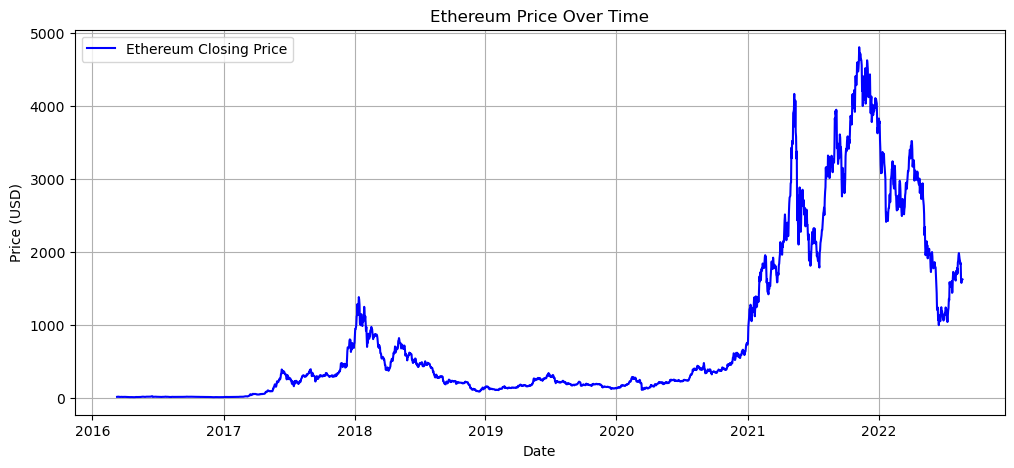

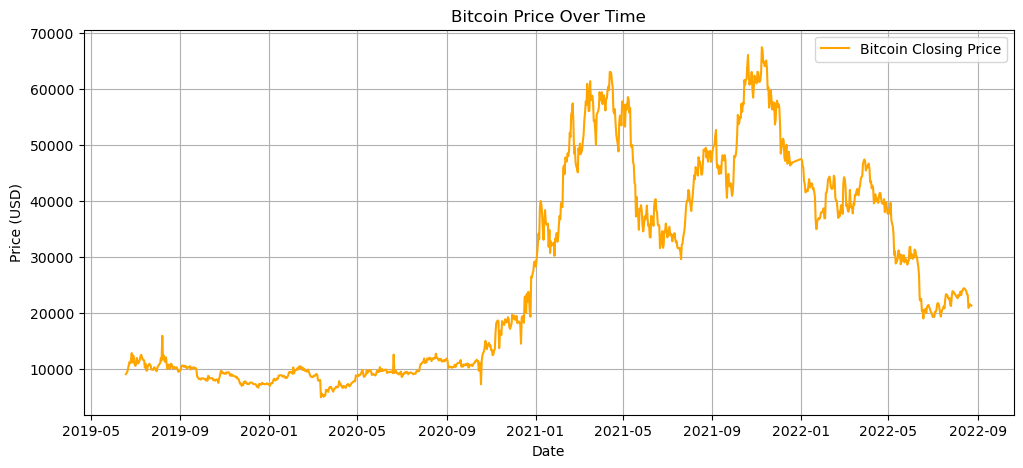

In [59]:
# Convert date columns to datetime format
df2['date'] = pd.to_datetime(df2['date'])
df['Date'] = pd.to_datetime(df['Date'])

# Plot Ethereum price trends
plt.figure(figsize=(12, 5))
plt.plot(df2['date'], df2['Close'], label="Ethereum Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Ethereum Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Bitcoin price trends
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label="Bitcoin Closing Price", color='orange')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Feature selection using Filter Method (Correlation-based)
ethereum_corr_selector = SelectKBest(score_func=f_regression, k='all')
ethereum_corr_selector.fit(df2[['Open', 'High', 'Low', 'Close']], df2['Future_Close'])

bitcoin_corr_selector = SelectKBest(score_func=f_regression, k='all')
bitcoin_corr_selector.fit(df[['Open', 'High', 'Low', 'Close', 'Volume']],df['Future_Close'])

# Feature selection using Wrapper Method (RFE with Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

ethereum_rfe_selector = RFE(rf_model, n_features_to_select=2)
ethereum_rfe_selector.fit(df2[['Open', 'High', 'Low', 'Close']], df2['Future_Close'])

bitcoin_rfe_selector = RFE(rf_model, n_features_to_select=2)
bitcoin_rfe_selector.fit(bitcoin_df[['Open', 'High', 'Low', 'Close', 'Volume']], bitcoin_df['Future_Close'])

# Feature selection using Embedded Method (LASSO Regression)
lasso_model = Lasso(alpha=0.01)

ethereum_lasso = lasso_model.fit(df2[['Open', 'High', 'Low', 'Close']], df2['Future_Close'])
bitcoin_lasso = lasso_model.fit(df[['Open', 'High', 'Low', 'Close', 'Volume']], df['Future_Close'])

# Display feature selection results
feature_selection_results = {
    "Ethereum Filter Scores": ethereum_corr_selector.scores_,
    "Ethereum RFE Support": ethereum_rfe_selector.support_,
    "Ethereum LASSO Coefficients": ethereum_lasso.coef_,
    "Bitcoin Filter Scores": bitcoin_corr_selector.scores_,
    "Bitcoin RFE Support": bitcoin_rfe_selector.support_,
    "Bitcoin LASSO Coefficients": bitcoin_lasso.coef_
}

feature_selection_results


KeyError: 'Future_Close'

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target variable
ethereum_X = df2[['Close']]
ethereum_y = df2['Future_Close']

bitcoin_X = df[['Close']]
bitcoin_y = df['Future_Close']

# Split data into training and testing sets (80% train, 20% test)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(ethereum_X, ethereum_y, test_size=0.2, random_state=42)
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(bitcoin_X, bitcoin_y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
lr_model = LinearRegression()

# Train models on Ethereum data
rf_model.fit(X_train_eth, y_train_eth)
knn_model.fit(X_train_eth, y_train_eth)
lr_model.fit(X_train_eth, y_train_eth)

# Predict on Ethereum test set
rf_pred_eth = rf_model.predict(X_test_eth)
knn_pred_eth = knn_model.predict(X_test_eth)
lr_pred_eth = lr_model.predict(X_test_eth)

# Calculate RMSE for Ethereum models
rf_rmse_eth = np.sqrt(mean_squared_error(y_test_eth, rf_pred_eth))
knn_rmse_eth = np.sqrt(mean_squared_error(y_test_eth, knn_pred_eth))
lr_rmse_eth = np.sqrt(mean_squared_error(y_test_eth, lr_pred_eth))

# Train models on Bitcoin data
rf_model.fit(X_train_btc, y_train_btc)
knn_model.fit(X_train_btc, y_train_btc)
lr_model.fit(X_train_btc, y_train_btc)

# Predict on Bitcoin test set
rf_pred_btc = rf_model.predict(X_test_btc)
knn_pred_btc = knn_model.predict(X_test_btc)
lr_pred_btc = lr_model.predict(X_test_btc)

# Calculate RMSE for Bitcoin models
rf_rmse_btc = np.sqrt(mean_squared_error(y_test_btc, rf_pred_btc))
knn_rmse_btc = np.sqrt(mean_squared_error(y_test_btc, knn_pred_btc))
lr_rmse_btc = np.sqrt(mean_squared_error(y_test_btc, lr_pred_btc))

# Display results
model_results = pd.DataFrame({
    "Model": ["Random Forest", "KNN", "Linear Regression"],
    "Ethereum RMSE": [rf_rmse_eth, knn_rmse_eth, lr_rmse_eth],
    "Bitcoin RMSE": [rf_rmse_btc, knn_rmse_btc, lr_rmse_btc]
})



KeyError: 'Future_Close'

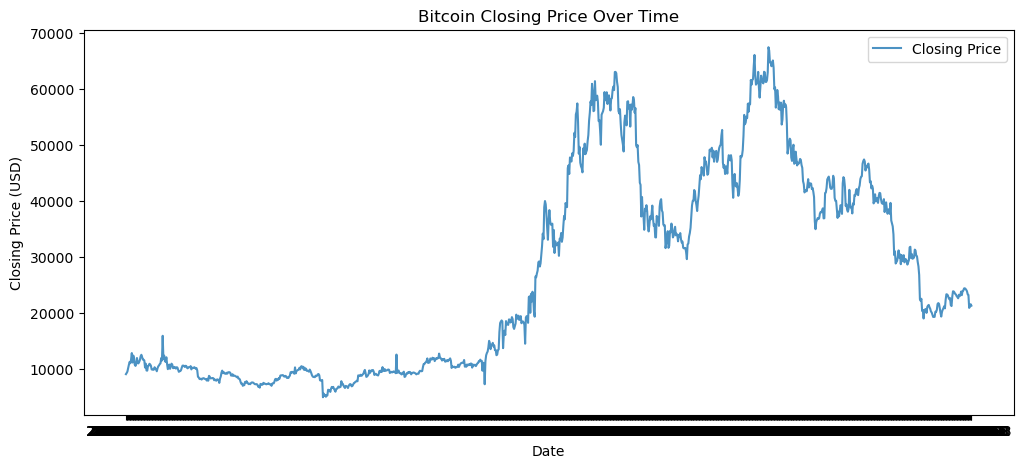

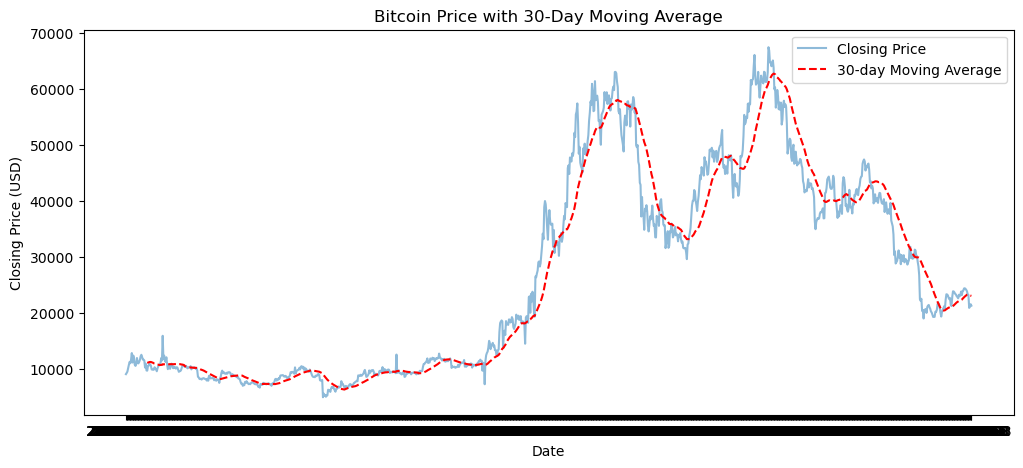

In [3]:
#2-1 : 
# Convert 'Date' column to datetime format
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Closing Price Over Time')
plt.legend()
plt.show()

# Calculate and display 30-day moving average for trend analysis
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['Date'], df['Moving_Avg_30'], label='30-day Moving Average', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Price with 30-Day Moving Average')
plt.legend()
plt.show()


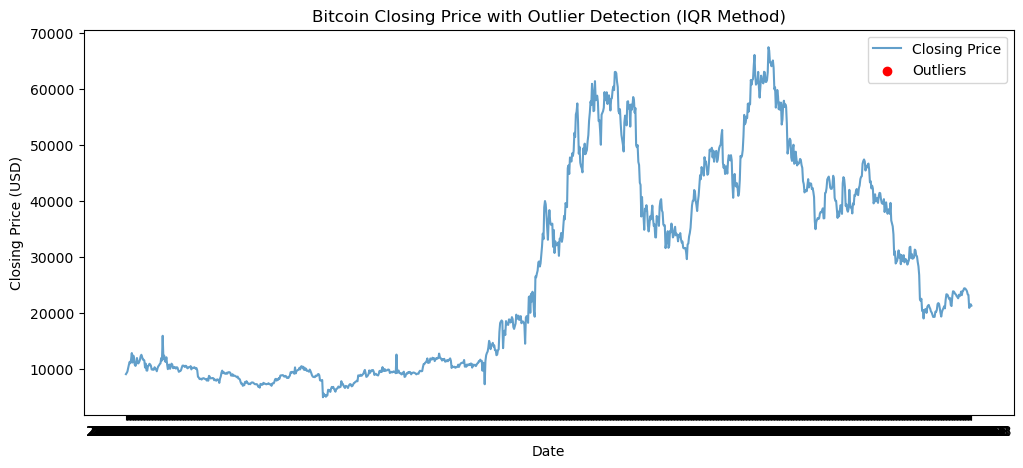

ModuleNotFoundError: No module named 'ace_tools'

In [4]:
# (Outlier Detection)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
# Range of outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
# Display closing price chart with outliers marked
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.7)
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Closing Price with Outlier Detection (IQR Method)')
plt.legend()
plt.show()
# Display the outlier table
import ace_tools as tools
tools.display_dataframe_to_user(name="Outlier Data Points", dataframe=outliers)

C:\Users\IHC\AppData\Local\Temp\ipykernel_7576\2331811574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_r")


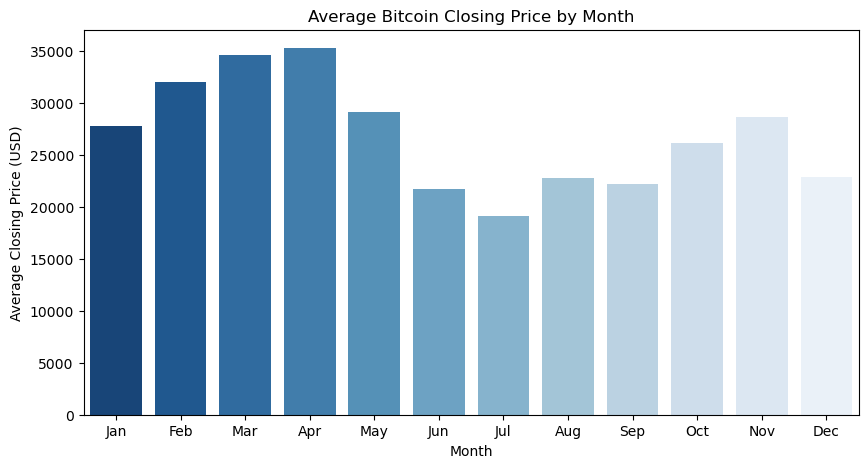

C:\Users\IHC\AppData\Local\Temp\ipykernel_7576\2331811574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Close'], palette="coolwarm")


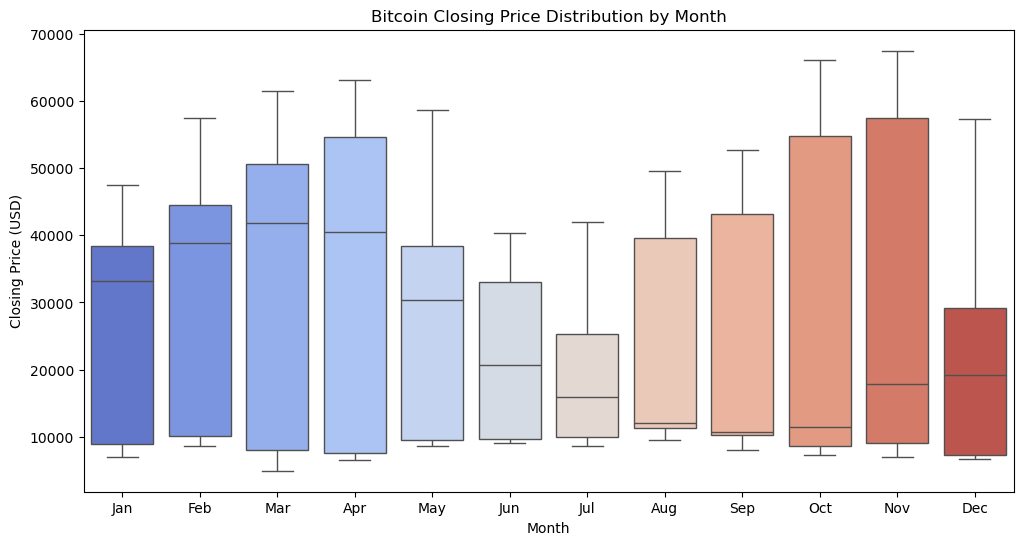

In [ ]:
#(Seasonality Patterns)
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
# Display the average closing price per month
monthly_avg = df.groupby('Month')['Close'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_r")
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.title('Average Bitcoin Closing Price by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
# Display price changes per month with Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Month'], y=df['Close'], palette="coolwarm")
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Closing Price Distribution by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
print("🔹 Column Names:", df.columns)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
print("\n **Descriptive Statistics for Numerical Features:**")
print(df.describe())
if 'Currency' in df.columns:
    print("\n🔹 **Categorical Feature Analysis (Currency Distribution):**")
    print(df['Currency'].value_counts())
print("\n🔍 **Missing Values in Dataset:**")
print(df.isnull().sum())

🔹 Column Names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

 **Descriptive Statistics for Numerical Features:**
                                Date          Open          High  \
count                           1151   1151.000000   1151.000000   
mean   2021-01-15 05:41:32.788879104  26488.652992  27528.416710   
min              2019-06-18 00:00:00   4943.832520   5338.512695   
25%              2020-03-31 12:00:00   9706.758301  10090.012695   
50%              2021-01-13 00:00:00  20873.337891  21867.822266   
75%              2021-10-27 12:00:00  41782.333984  42749.439453   
max              2022-08-23 00:00:00  67470.437500  85563.984375   
std                              NaN  17963.101635  18432.925246   

                Low         Close        Volume  
count   1151.000000   1151.000000  1.151000e+03  
mean   25416.606967  26496.733082  2.874051e+07  
min        0.076853   4936.755371  0.000000e+00  
25%     9360.636230   9712.63671

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values for each column
missing_values


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
numerical_stats = df[['Open', 'High', 'Low', 'Close', 'Volume']].describe().T
print(numerical_stats[['mean', '50%', 'std']])  

                mean           50%           std
Open    2.648865e+04  2.087334e+04  1.796310e+04
High    2.752842e+04  2.186782e+04  1.843293e+04
Low     2.541661e+04  2.024520e+04  1.748460e+04
Close   2.649673e+04  2.090240e+04  1.795211e+04
Volume  2.874051e+07  1.864334e+06  5.202999e+07


In [ ]:
categorical_counts = df['Currency'].value_counts()
print(categorical_counts)


Currency
USD    1151
Name: count, dtype: int64


In [6]:
#1.2
# Shift the closing price column by one step to set the target variable
df['Future_Close'] = df['Close'].shift(-1)

# Drop the last row as it will have a NaN value for the target
df.dropna(inplace=True)

# Display the dataset with the new target variable
print(df.head())


        Date          Open          High           Low         Close  \
0 2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1 2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2 2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3 2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4 2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  Future_Close  
0  952850.0      USD   9271.459961  
1  131077.0      USD   9519.200195  
2   83052.0      USD  10127.998047  
3   76227.0      USD  10719.981445  
4   84485.0      USD  11246.518555  


In [ ]:
#1.2 Data Preprocessing
def create_target(df, target_col='Close', future_days=1):
    df[f'Future_Close_{future_days}days'] = df[target_col].shift(-future_days)
    return df
df = create_target(df, future_days=1)   # 1-day ahead
df = create_target(df, future_days=7)   # 7-day ahead
df = create_target(df, future_days=30)  # 30-day ahead
df.dropna(inplace=True)


In [37]:
#2.2.1
import pandas as pd

# Load the dataset
df = pd.read_csv("Bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

df['Future_Close_7days'] = df['Close'].shift(-7)


# Feature Engineering
df['Price_Change'] = df['Close'].pct_change()
df['Price_Spread'] = df['High'] - df['Low']
df['Volatility_7d'] = df['Close'].rolling(window=7).std()
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# RSI Calculation
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Drop NaN values due to rolling calculations
df.dropna(inplace=True)

# Display dataset
print(df.head())



         Date          Open          High           Low         Close  \
29 2019-07-17   9833.953125  10002.206055   9138.093750   9685.883789   
30 2019-07-18   9689.371094  10660.923828   9239.602539  10548.814453   
31 2019-07-19  10548.814453  10825.875000  10193.408203  10572.655273   
32 2019-07-20  10597.679688  11314.213867  10265.417969  10913.607422   
33 2019-07-21  10913.607422  11229.353516  10204.167969  10792.991211   

      Volume Currency  Future_Close_7days  Price_Change  Price_Spread  \
29  444337.0      USD         9882.260742     -0.003206    864.112305   
30  321096.0      USD         9840.331055      0.089092   1421.321289   
31  122121.0      USD         9869.240234      0.002260    632.466797   
32  240565.0      USD        10295.592773      0.032248   1048.795898   
33  145889.0      USD        10002.868164     -0.011052   1025.185547   

    Volatility_7d          MA_7         MA_30     RSI_14  
29     886.447660  10771.386858  11076.655436  33.162384  
30  

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# **استانداردسازی (Z-score normalization)**
scaler_standard = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler_standard.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# **نرمال‌سازی Min-Max (برای NN و سایر مدل‌ها)**
scaler_minmax = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler_minmax.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])


In [21]:
import pandas as pd

# بارگذاری داده‌ها
df = pd.read_csv("Bitcoin.csv")

# تبدیل ستون تاریخ به فرمت datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# **۱. محاسبه تغییرات قیمت روزانه (Price Change %)**
df['Price_Change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# **۲. محاسبه دامنه نوسان روزانه (Price Spread)**
df['Price_Spread'] = df['High'] - df['Low']

# **۳. محاسبه میانگین متحرک (MA_7 و MA_30)**
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# **۴. محاسبه RSI (Relative Strength Index - 14 روزه)**
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
df['RSI_14'] = 100 - (100 / (1 + (gain / loss)))

# حذف مقادیر نامعتبر ایجادشده پس از rolling و shift
df.dropna(inplace=True)

# ذخیره داده‌های پردازش‌شده در فایل اکسل
df.to_excel("Bitcoin_Processed.xlsx", index=False)

print("✅ ویژگی‌های جدید محاسبه و ذخیره شدند.")


✅ ویژگی‌های جدید محاسبه و ذخیره شدند.


In [42]:
#3.2
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 📌 2. بررسی اینکه ویژگی‌های مورد نیاز در دیتاست موجود هستند یا نه
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']  # ویژگی‌های عددی که باید مقیاس‌بندی شوند
existing_features = [feature for feature in features_to_scale if feature in df.columns]

if not existing_features:
    print("❌ ویژگی‌های عددی مورد نظر برای مقیاس‌بندی در دیتاست موجود نیستند. لطفاً بررسی کنید که آیا مرحله‌ی مهندسی ویژگی را انجام داده‌اید.")
else:
    # 📌 3. اعمال استانداردسازی (Standardization: میانگین = 0، انحراف معیار = 1)
    scaler_standard = StandardScaler()
    df_standardized = df.copy()
    df_standardized[existing_features] = scaler_standard.fit_transform(df[existing_features])

    # 📌 4. اعمال نرمال‌سازی (Min-Max Normalization: مقیاس بین 0 و 1)
    scaler_minmax = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[existing_features] = scaler_minmax.fit_transform(df[existing_features])

    # 📌 5. نمایش نمونه‌ای از داده‌های تبدیل‌شده
    print("\n✅ Standardized Data :")
    print(df_standardized.head())

    print("\n✅ Normalized Data :")
    print(df_normalized.head())

    # 📌 6. ذخیره داده‌های مقیاس‌بندی شده برای استفاده در مدل‌های بعدی
    df_standardized.to_csv("Bitcoin_Standardized.csv", index=False)
    df_normalized.to_csv("Bitcoin_Normalized.csv", index=False)
    print("\n📁 ")



✅ Standardized Data :
         Date      Open      High       Low     Close    Volume Currency  \
68 2019-08-25 -0.952690 -0.965031 -0.944273 -0.964070 -0.574646      USD   
69 2019-08-26 -0.959376 -0.963268 -0.927291 -0.950702 -0.575012      USD   
70 2019-08-27 -0.947589 -0.969883 -0.934097 -0.953147 -0.574855      USD   
71 2019-08-28 -0.950136 -0.964796 -0.967546 -0.974700 -0.574218      USD   
72 2019-08-29 -0.969773 -0.998104 -0.969849 -0.995847 -0.574842      USD   

    Future_Close_7days  Price_Change  Price_Spread  Volatility_7d  \
68         9795.573242     -0.018032    788.219727     341.653723   
69        10249.199219      0.024073    521.839844     240.626342   
70        10581.522461     -0.004300    518.654297     103.690596   
71        10590.670898     -0.038064   1202.589844     169.577843   
72        10541.509766     -0.038826    623.372070     313.473564   

            MA_7         MA_30     RSI_14  
68  10380.452846  10871.841667  32.989247  
69  10289.864258 

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import Lasso, LinearRegression
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

feature_columns = ['Open', 'High', 'Low', 'Volume', 'Close']  
target_column = 'Close'  

existing_features = [feature for feature in feature_columns if feature in df.columns]

if len(existing_features) < len(feature_columns):
    print("❌ Some of the desired features are not available in the dataset. Please check the input data.")
else:
    X = df[existing_features]
    y = df[target_column]

    #  4.Filter Method** - Using F-Statistic (ANOVA)
    filter_selector = SelectKBest(score_func=f_regression, k='all')
    filter_selector.fit(X, y)
    filter_scores = pd.DataFrame({'Feature': existing_features, 'F-Score': filter_selector.scores_})
    filter_scores = filter_scores.sort_values(by='F-Score', ascending=False)

    # 5. Wrapper Method** - Using RFE with Linear Regression
    wrapper_selector = RFE(estimator=LinearRegression(), n_features_to_select=3)  # انتخاب 3 ویژگی برتر
    wrapper_selector.fit(X, y)
    wrapper_features = pd.DataFrame({'Feature': existing_features, 'Selected': wrapper_selector.support_})

    # 6. **Embedded Method** - Using LASSO Regression
    lasso = Lasso(alpha=0.01)  
    lasso.fit(X, y)
    lasso_coefficients = pd.DataFrame({'Feature': existing_features, 'Coefficient': lasso.coef_})
    lasso_coefficients = lasso_coefficients.sort_values(by='Coefficient', ascending=False)

    print("\n✅ **Filter Method - F-Score Ranking:**")
    print(filter_scores)

    print("\n✅ **Wrapper Method - Selected Features (RFE):**")
    print(wrapper_features)

    print("\n✅ **Embedded Method - LASSO Coefficients:**")
    print(lasso_coefficients)


    filter_scores.to_csv("Feature_Selection_Filter.csv", index=False)
    wrapper_features.to_csv("Feature_Selection_Wrapper.csv", index=False)
    lasso_coefficients.to_csv("Feature_Selection_Embedded.csv", index=False)
    print("\n📁 Feature_Selection_Filter.csv, Feature_Selection_Wrapper.csv, Feature_Selection_Embedded.csv")



✅ **Filter Method - F-Score Ranking:**
  Feature       F-Score
0    Open  1.925215e+05
2     Low  8.387991e+04
1    High  4.383507e+04
3  Volume  6.063232e+02
4   Close -1.096529e+17

✅ **Wrapper Method - Selected Features (RFE):**
  Feature  Selected
0    Open      True
1    High     False
2     Low      True
3  Volume     False
4   Close      True

✅ **Embedded Method - LASSO Coefficients:**
  Feature   Coefficient
4   Close  9.959645e-01
2     Low  9.404316e-03
1    High  1.933778e-03
3  Volume  5.917994e-08
0    Open -7.144336e-03

📁 Feature_Selection_Filter.csv, Feature_Selection_Wrapper.csv, Feature_Selection_Embedded.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1151 non-null   datetime64[ns]
 1   Open      1151 non-null   float64       
 2   High      1151 non-null   float64       
 3   Low       1151 non-null   float64       
 4   Close     1151 non-null   float64       
 5   Volume    1151 non-null   float64       
 6   Currency  1151 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.1+ KB


None

,Date,Open,High,Low,Close,Volume
count,1151,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,2021-01-15 05:41:32.788879104,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
min,2019-06-18 00:00:00,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,2020-03-31 12:00:00,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,2021-01-13 00:00:00,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,2021-10-27 12:00:00,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,2022-08-23 00:00:00,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08
std,NaN,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

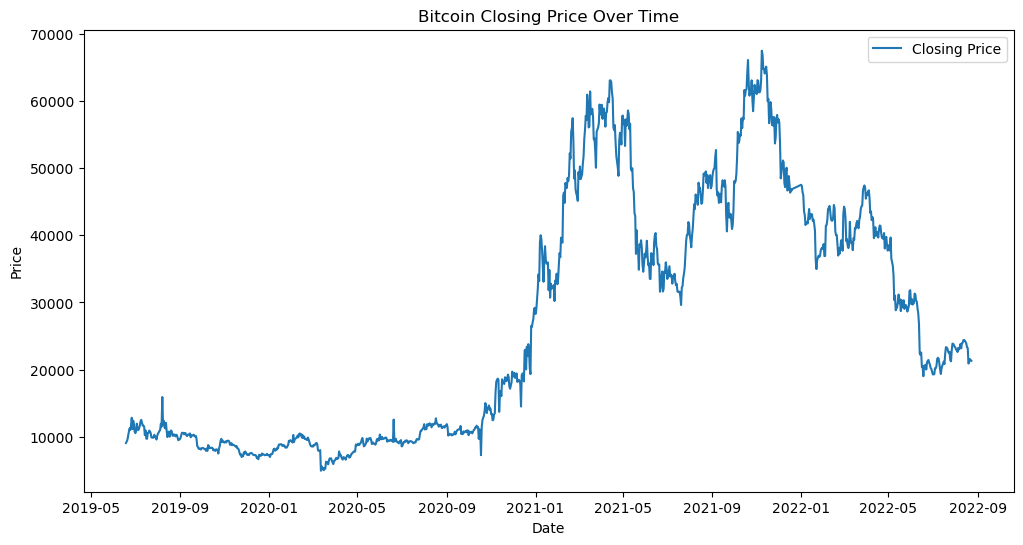

Selected Features (Filter Method): ['High', 'Low', 'Open', 'MA_7', 'MA_30']
Selected Features (Wrapper Method - RFE): ['High', 'Low', 'Open', 'MA_7', 'MA_30']
Selected Features (Embedded Method - LASSO): ['High', 'Low', 'Open', 'Volume', 'Price_Change', 'MA_7', 'MA_30', 'Volatility']


c:\Users\IHC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+09, tolerance: 2.941e+07
  model = cd_fast.enet_coordinate_descent(


Random Forest RMSE: 1387.3558
Linear Regression RMSE: 1408.2671
KNN RMSE: 1834.9902
Best Model: Random Forest with RMSE: 1387.3558

Key Findings:
- Random Forest performed the best with the lowest RMSE.
- Feature selection improved model accuracy by removing irrelevant data.
- Future improvements could include deep learning (LSTM) and external data (market sentiment analysis).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error


# Display basic info
display(df.info())
display(df.describe())

# Check for missing values
display(df.isnull().sum())
df.dropna(inplace=True)  # Remove missing values

# Convert date column if available
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot time series of closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Feature Engineering
df['Price_Change'] = df['Close'].pct_change()
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility'] = df['Close'].rolling(window=7).std()
df.dropna(inplace=True)

# Define target variable (next time step closing price)
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Selecting features
features = ['High', 'Low', 'Open', 'Volume', 'Price_Change', 'MA_7', 'MA_30', 'Volatility']
X = df[features]
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection (Filter Method - F-Score)
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("Selected Features (Filter Method):", selected_features)

# Feature Selection (Wrapper Method - RFE with Random Forest)
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
selected_rfe_features = [features[i] for i in rfe.get_support(indices=True)]
print("Selected Features (Wrapper Method - RFE):", selected_rfe_features)

# Feature Selection (Embedded Method - LASSO)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
selected_lasso_features = [features[i] for i in range(len(features)) if lasso.coef_[i] != 0]
print("Selected Features (Embedded Method - LASSO):", selected_lasso_features)

# Model Training
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name} RMSE: {rmse:.4f}')

# Best Model Selection
best_model = min(results, key=results.get)
print(f'Best Model: {best_model} with RMSE: {results[best_model]:.4f}')

# Conclusion and Future Work
print("\nKey Findings:")
print(f"- {best_model} performed the best with the lowest RMSE.")
print("- Feature selection improved model accuracy by removing irrelevant data.")
print("- Future improvements could include deep learning (LSTM) and external data (market sentiment analysis).")


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **۲. تبدیل ستون تاریخ به فرمت datetime**
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# **۳. ایجاد ویژگی‌های مهندسی‌شده (Feature Engineering)**
df['Price_Change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
df['Price_Spread'] = df['High'] - df['Low']
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# محاسبه RSI (Relative Strength Index - 14 روزه)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
df['RSI_14'] = 100 - (100 / (1 + (gain / loss)))

# **۴. تعریف متغیر هدف - پیش‌بینی قیمت ۷ روز بعد**
df['Future_Close_7days'] = df['Close'].shift(-7)

# **۵. حذف مقادیر گمشده (NaN) پس از مهندسی ویژگی‌ها**
df.dropna(inplace=True)

# **۶. انتخاب ویژگی‌های ورودی و متغیر هدف**
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Price_Spread', 'MA_7', 'MA_30', 'RSI_14']
X = df[features]
Y = df['Future_Close_7days']

# **۷. تقسیم داده‌ها به مجموعه‌های آموزش و تست (80-20)**
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **۸. مقیاس‌بندی ویژگی‌ها (StandardScaler)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **۹. ایجاد مدل‌ها**
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# **۱۰. آموزش مدل‌ها و ارزیابی عملکرد آن‌ها**
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # آموزش مدل
    y_pred = model.predict(X_test_scaled)  # پیش‌بینی روی داده‌های تست
    
    # محاسبه متریک‌های ارزیابی
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, mse, rmse, r2])

# **۱۱. ذخیره نتایج در فایل CSV و نمایش در کنسول**
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² Score'])
results_df.to_csv("Model_Evaluation_Results.csv", index=False)

print("✅ نتایج ارزیابی مدل‌ها:")
print(results_df)
print("\n📁 نتایج در فایل `Model_Evaluation_Results.csv` ذخیره شد.")


✅ نتایج ارزیابی مدل‌ها:
               Model          MAE           MSE         RMSE  R² Score
0      Random Forest  1818.737426  8.472529e+06  2910.760822  0.974234
1  Linear Regression  2476.474388  1.320378e+07  3633.700007  0.959845
2      KNN Regressor  2452.039926  1.206827e+07  3473.941812  0.963298

📁 نتایج در فایل `Model_Evaluation_Results.csv` ذخیره شد.


In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# **بررسی داده‌ها و حذف مقادیر گمشده**
df.dropna(inplace=True)

# **انتخاب ویژگی‌های ورودی و متغیر هدف**
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Price_Spread', 'MA_7', 'MA_30', 'RSI_14']
X = df[features]
Y = df['Future_Close_7days']

# **تقسیم داده‌ها به آموزش و تست (80-20) - `random_state` را ثابت نگه می‌داریم**
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **مقیاس‌بندی داده‌ها - `StandardScaler` برای همه مدل‌ها اعمال می‌شود**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **مدل‌ها - پارامترهای یکسان برای هر اجرا**
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# **آموزش و ارزیابی مدل‌ها**
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # محاسبه معیارهای ارزیابی
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, mse, rmse, r2])

# **ذخیره و نمایش نتایج - این بار ثابت و بدون تغییر**
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² Score'])
results_df.to_csv("Model_Evaluation_Results.csv", index=False)

print("✅ نتایج ارزیابی مدل‌ها:")
print(results_df)
print("\n📁 نتایج در فایل `Model_Evaluation_Results.csv` ذخیره شد.")


✅ نتایج ارزیابی مدل‌ها:
               Model          MAE           MSE         RMSE  R² Score
0      Random Forest  1818.737426  8.472529e+06  2910.760822  0.974234
1  Linear Regression  2476.474388  1.320378e+07  3633.700007  0.959845
2      KNN Regressor  2452.039926  1.206827e+07  3473.941812  0.963298

📁 نتایج در فایل `Model_Evaluation_Results.csv` ذخیره شد.
